## Data Preprocessing

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Import Dataset

In [2]:
raw_data = pd.read_csv("../Dataset/items.csv")

In [3]:
df = raw_data.copy()

In [4]:
df

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
...,...,...,...,...
4095,2132318,GROCERY I,1002,0
4096,2132945,GROCERY I,1026,0
4097,2132957,GROCERY I,1068,0
4098,2134058,BEVERAGES,1124,0


In [5]:
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [8]:
# df

In [9]:
df.shape

(4100, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
item_nbr      4100 non-null int64
family        4100 non-null object
class         4100 non-null int64
perishable    4100 non-null int64
dtypes: int64(3), object(1)
memory usage: 128.2+ KB


In [11]:
# Check NULL Values
df.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

In [12]:
types = df["family"].unique()

In [13]:
types

array(['GROCERY I', 'CLEANING', 'BREAD/BAKERY', 'DELI', 'POULTRY', 'EGGS',
       'PERSONAL CARE', 'LINGERIE', 'BEVERAGES', 'AUTOMOTIVE', 'DAIRY',
       'GROCERY II', 'MEATS', 'FROZEN FOODS', 'HOME APPLIANCES',
       'SEAFOOD', 'PREPARED FOODS', 'LIQUOR,WINE,BEER', 'BEAUTY',
       'HARDWARE', 'LAWN AND GARDEN', 'PRODUCE', 'HOME AND KITCHEN II',
       'HOME AND KITCHEN I', 'MAGAZINES', 'HOME CARE', 'PET SUPPLIES',
       'BABY CARE', 'SCHOOL AND OFFICE SUPPLIES',
       'PLAYERS AND ELECTRONICS', 'CELEBRATION', 'LADIESWEAR', 'BOOKS'],
      dtype=object)

In [14]:
# Number of Unique "family" Values
types_len = len(df["family"].unique())

In [15]:
types_len

33

In [16]:
len(df["class"].unique())

337

In [17]:
# Every Item is Unique i.e. No Repetition
len(df["item_nbr"].unique())

4100

#### Create Summary Tabe

In [18]:
df[df.family == 'CLEANING'].shape

(446, 4)

In [19]:
summary = pd.DataFrame(columns = ["Family"], data = types)

In [20]:
type_val = []
for t in types :
    type_val.append(df[df.family == t ].shape[0])

In [21]:
type_val

[1334,
 446,
 134,
 91,
 54,
 41,
 153,
 20,
 613,
 20,
 242,
 14,
 84,
 55,
 1,
 8,
 26,
 73,
 19,
 4,
 26,
 306,
 45,
 77,
 6,
 108,
 14,
 1,
 15,
 17,
 31,
 21,
 1]

In [22]:
summary["Count"] = type_val

In [23]:
summary

,Family,Count
0,GROCERY I,1334
1,CLEANING,446
2,BREAD/BAKERY,134
3,DELI,91
4,POULTRY,54
5,EGGS,41
6,PERSONAL CARE,153
7,LINGERIE,20
8,BEVERAGES,613
9,AUTOMOTIVE,20


#### Plot of Summary Table

<Figure size 432x288 with 0 Axes>

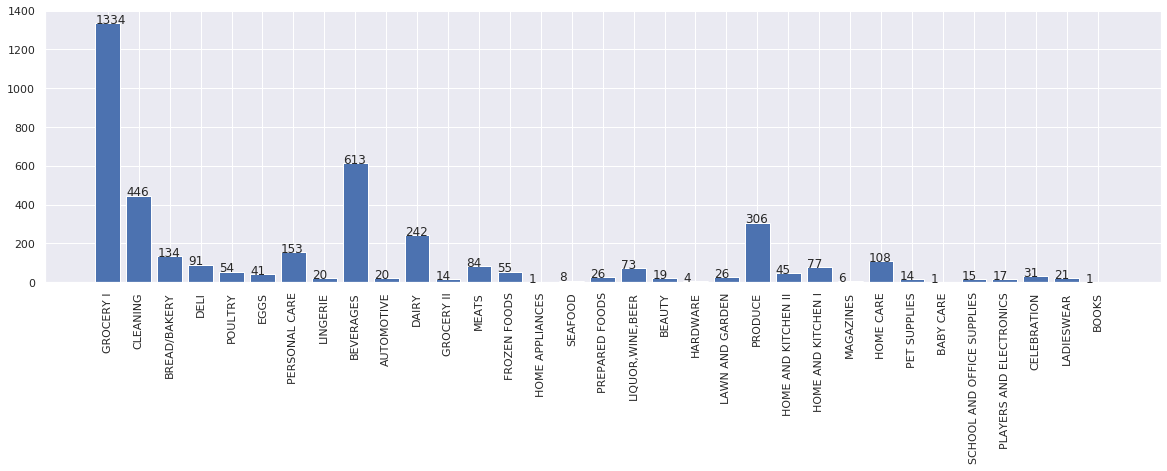

In [24]:
fig = plt.figure()
x = types
height = type_val
f, ax = plt.subplots(figsize=(20,5))
ax.bar(x, height)

for index,data in enumerate(type_val):
    plt.text(x = index-0.4 , y = data , s = f"{data}" , fontdict = dict(fontsize=12))
    
plt.xticks(rotation = 90)
plt.show()

#### Final Dataset

In [25]:
df_preprocessed = summary.copy()

In [26]:
df_preprocessed.to_excel("../Sheets/Items.xlsx")  

In [27]:
df_preprocessed.to_csv("../Preprocessed Datasets/Items_Preprocessed.csv", index = False)